In [1]:
import nltk


In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ C

        C:\Users\belug\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


In [4]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


In [9]:
print(len(messages))

5572


In [6]:
import pandas as pd

In [8]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:

import seaborn as sns

array([<AxesSubplot: title={'center': 'ham'}>,
       <AxesSubplot: title={'center': 'spam'}>], dtype=object)

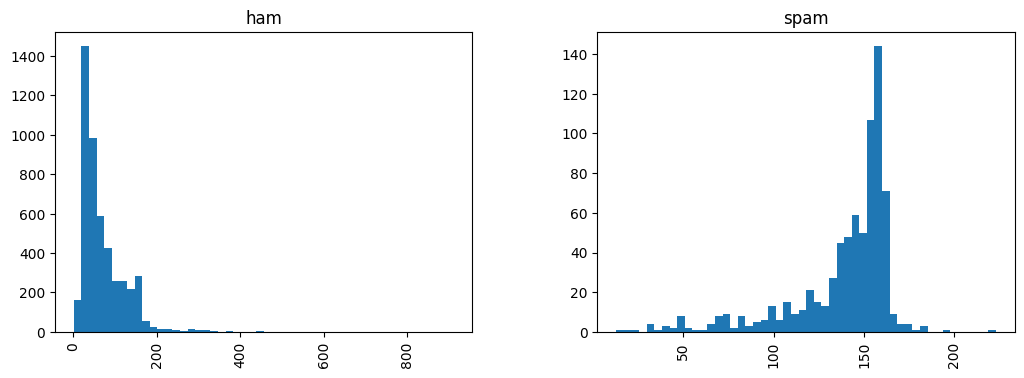

In [13]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [14]:
import string

In [16]:
from nltk.corpus import stopwords

In [18]:
def process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)


    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
messages['message'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
transformer = CountVectorizer(analyzer=process).fit(messages['message'])

In [31]:
bow4 = transformer.transform([messages['message'][4]])

In [24]:
messages_bow = transformer.transform(messages['message'])

In [25]:
#shape of sparse matrix
print(messages_bow.shape)

(5572, 11425)


In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [32]:
tfidf4 = tfidf_transformer.transform(bow4)

In [33]:
print(tfidf4)

  (0, 10799)	0.4019015462543087
  (0, 10450)	0.35407004444444734
  (0, 10433)	0.27043580251222216
  (0, 7842)	0.4457437273623316
  (0, 6877)	0.35407004444444734
  (0, 6123)	0.24090226292109554
  (0, 4777)	0.3104226271508041
  (0, 2948)	0.4019015462543087


In [34]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
spam_detection = MultinomialNB().fit(messages_tfidf, messages['label'])

In [38]:
from sklearn.model_selection import train_test_split


In [43]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipeline = Pipeline(steps=[
    ('bow', CountVectorizer(analyzer=process)),
    ('tdidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [46]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x0000023A701AEB90>)),
                ('tdidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [47]:
predictions = pipeline.predict(msg_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(label_test, predictions))
print('\n')
print(confusion_matrix(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1444
        spam       1.00      0.73      0.84       228

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



[[1444    0]
 [  62  166]]
